## Imports and loading data
Loading the boston dataset directly from its "[source](http://lib.stat.cmu.edu/datasets/boston)".

In [1]:
from IPython.display import clear_output as clear
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import urllib

%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

file = urllib.request.urlopen(data_url)
columns = list(map(lambda x: x.split(' ')[1], [line.decode('utf-8') for line in file][7:20]))
data = pd.DataFrame(data=data, columns=columns)
data["PRICE"] = target

## Descriptive Statistics

In [3]:
print(
    f"Minimum price:\t{data.PRICE.min():05.2f}",
    f"Maximum price:\t{data.PRICE.max():.2f}",
    f"Mean price:\t{data.PRICE.mean():.2f}",
    f"Median price:\t{data.PRICE.median():.2f}",
    sep='\n'
)

Minimum price:	05.00
Maximum price:	50.00
Mean price:	22.53
Median price:	21.20


In [4]:
data['PRICE'].quantile(.05),data['PRICE'].quantile(.95)

(10.2, 43.4)

In [5]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [6]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

$$ \rho _{XY} = corr(X,Y) $$
<hr>
$$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
data["PRICE"].corr(data["RM"]) # Positive correlation

0.6953599470715393

In [10]:
data["PRICE"].corr(data["PTRATIO"]) # Negative correlation

-0.5077866855375616

In [11]:
data.corr() # Correlation table.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [12]:
mask = np.zeros_like(data.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

data.corr()*(1-mask)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.0
ZN,-0.200469,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.0
INDUS,0.406583,-0.533828,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.0
CHAS,-0.055892,-0.042697,0.062938,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.0
NOX,0.420972,-0.516604,0.763651,0.091203,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.0
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.0
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.0
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.0
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.0
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,0.000000,0.000000,-0.000000,0.000000,-0.0


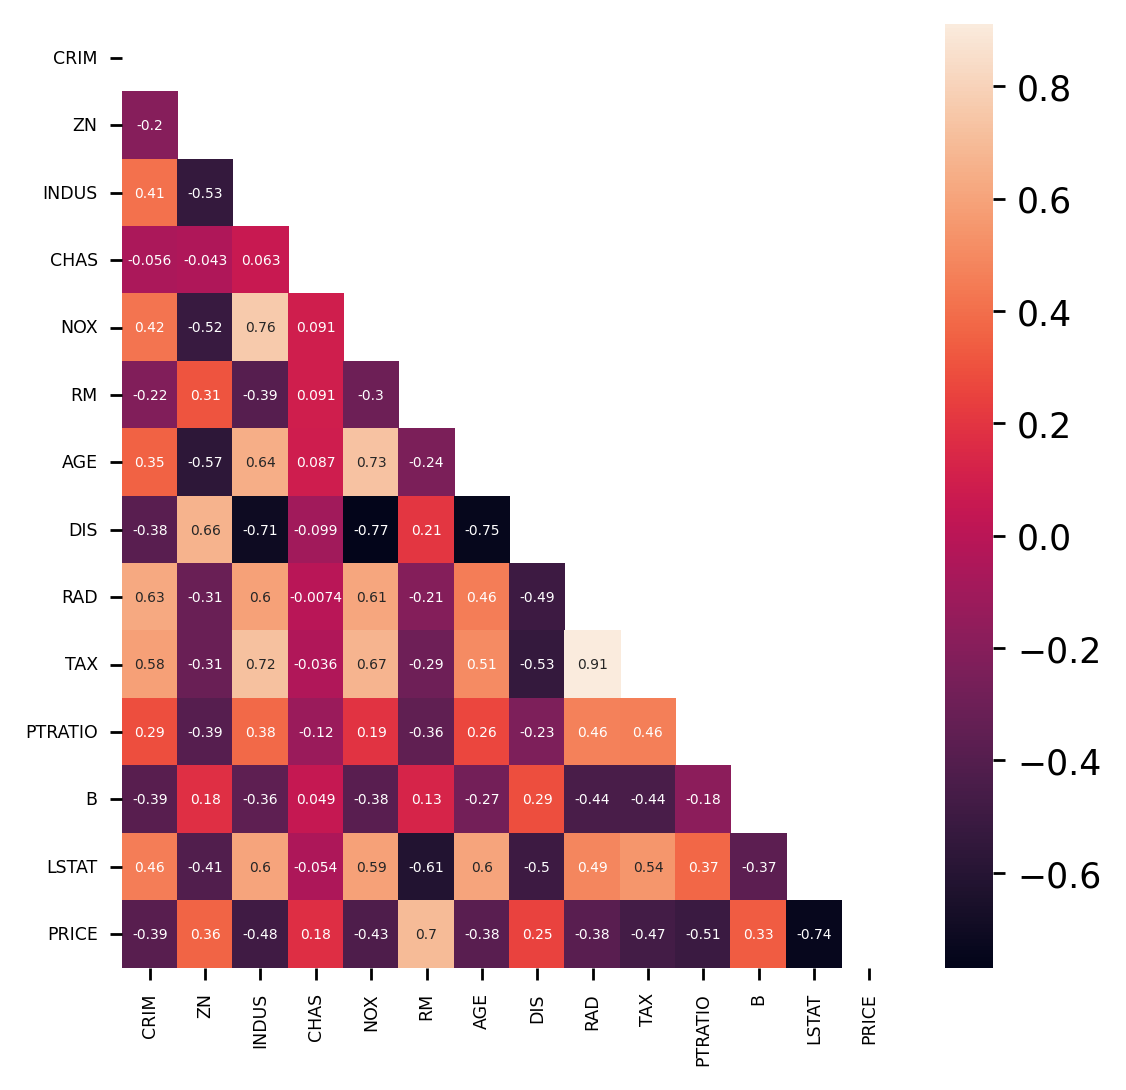

In [13]:
plt.figure(figsize=(5,5), dpi=250)
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 4})
sns.set()
sns.set_style('white')
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

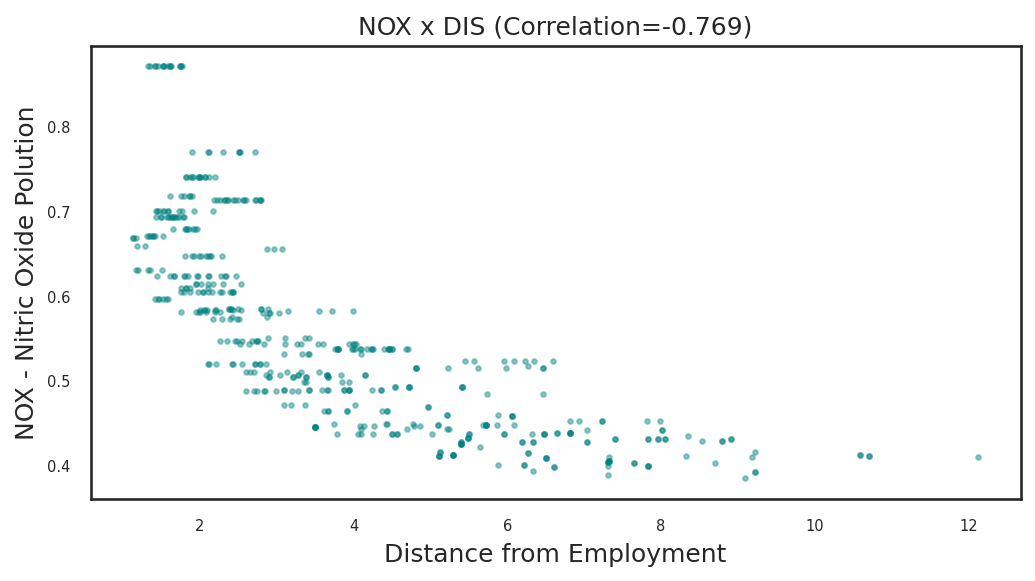

In [14]:
plt.figure(figsize=(8,4), dpi=150)
plt.scatter(y=data["NOX"], x=data['DIS'], color='teal', s=5, alpha=.4)

plt.title(f"NOX x DIS (Correlation={data['NOX'].corr(data['DIS']):.3f})")
plt.xlabel("Distance from Employment")
plt.ylabel("NOX - Nitric Oxide Polution")
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.show()

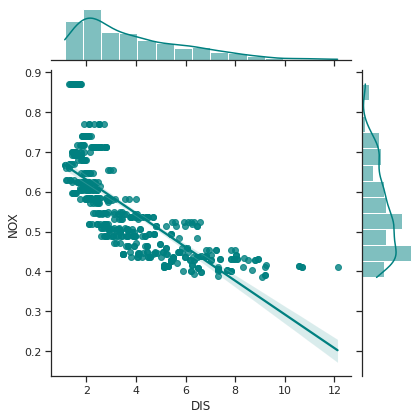

In [15]:
sns.set()
sns.set_context('notebook')
sns.set_style('ticks')
# plt.figure(figsize=(8,4), dpi=200)
sns.jointplot(x=data['DIS'],y=data['NOX'], color='teal', kind='reg')

plt.show()